In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [4]:
#data preprocessing

#dataset overview
ecc = pd.read_csv('ecc_dataset_with_variability.csv')
ecc.head()
ecc.info()
ecc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SNR                 10000 non-null  float64
 1   BER                 10000 non-null  float64
 2   Noise Power         10000 non-null  float64
 3   Latency             10000 non-null  int64  
 4   Bandwidth           10000 non-null  float64
 5   Error Burst Length  10000 non-null  int64  
 6   Data Type           10000 non-null  object 
 7   Network Type        10000 non-null  object 
 8   Optimal ECC         10000 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 703.3+ KB


,SNR,BER,Noise Power,Latency,Bandwidth,Error Burst Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.043422,0.012737,0.266595,268.672300,53.599156,3.990800
std,8.913329,0.072620,0.178813,180.718061,41.458262,2.480671
min,-5.000000,0.000002,0.000000,1.000000,0.981013,1.000000
25%,7.424435,0.002561,0.136000,134.750000,26.010734,2.000000
50%,14.986679,0.005048,0.259000,261.000000,51.013203,4.000000
75%,22.570135,0.007521,0.382000,384.000000,76.416140,6.000000
max,49.447711,1.000000,1.991000,1936.000000,500.000000,10.000000


In [6]:
#check for missing values
print(ecc.isna().sum())

#encoding non-numerical data
ecc['Data Type'] = ecc['Data Type'].map({'Streaming': 0, 'Packet': 1})
ecc['Network Type'] = ecc['Network Type'].map({'Wi-Fi': 0, '5G': 1, 'Satellite': 2, 'IoT': 3, 'Storage': 4})
ecc['Optimal ECC'] = ecc['Optimal ECC'].map({'Hamming': 0, 'Reed-Solomon': 1, 'BCH': 2, 'LDPC': 3, 'Turbo': 4, 'Convolutional': 5, 'Polar': 6})

ecc.head()

SNR                   0
BER                   0
Noise Power           0
Latency               0
Bandwidth             0
Error Burst Length    0
Data Type             0
Network Type          0
Optimal ECC           0
dtype: int64


,SNR,BER,Noise Power,Latency,Bandwidth,Error Burst Length,Data Type,Network Type,Optimal ECC
0,18.149818,0.006893,0.292,154,57.948430,4,1,4,2
1,13.225703,0.008966,0.488,255,99.078012,2,0,1,3
2,22.753958,0.001112,0.427,314,49.469618,4,1,1,3
3,1.473567,0.000182,0.065,430,19.630334,3,1,2,3
4,22.528353,0.008378,0.234,357,19.787727,1,0,0,4


In [8]:
X = ecc.drop(columns=['Optimal ECC'])
y = ecc['Optimal ECC']

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = tts(X_scaled,y,test_size=0.3)

In [42]:

svm_model = SVC(kernel='linear', C=1.4)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate Model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.7406666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.85      0.96      0.90       756
           2       0.62      0.68      0.65       326
           3       0.70      0.83      0.76       851
           4       0.75      0.72      0.74       389
           5       0.71      0.70      0.71       410
           6       0.00      0.00      0.00       110

    accuracy                           0.74      3000
   macro avg       0.52      0.56      0.54      3000
weighted avg       0.67      0.74      0.71      3000


Confusion Matrix:
 [[  0  39  28  34  24  33   0]
 [  0 724   7  12   5   8   0]
 [  0  19 223  68  13   3   0]
 [  0  21  33 706  29  62   0]
 [  0  15   6  80 282   6   0]
 [  0  19   6  86  12 287   0]
 [  0  14  57  25   9   5   0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Tuning SVM with linear kernel...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


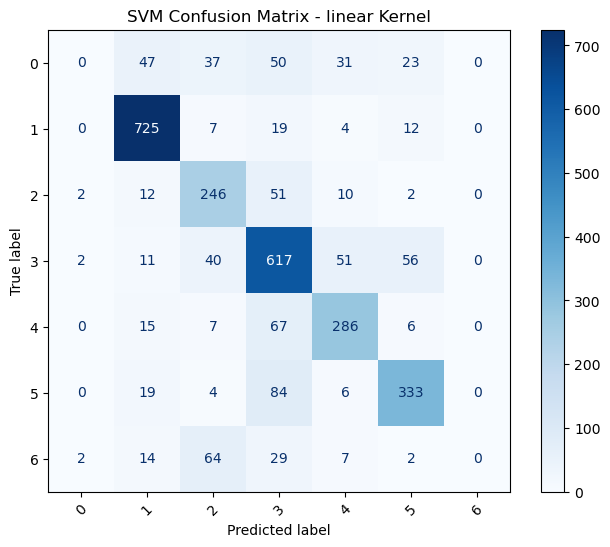


Classification Report - linear Kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.86      0.95      0.90       767
           2       0.61      0.76      0.68       323
           3       0.67      0.79      0.73       777
           4       0.72      0.75      0.74       381
           5       0.77      0.75      0.76       446
           6       0.00      0.00      0.00       118

    accuracy                           0.74      3000
   macro avg       0.52      0.57      0.54      3000
weighted avg       0.67      0.74      0.70      3000


Tuning SVM with rbf kernel...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


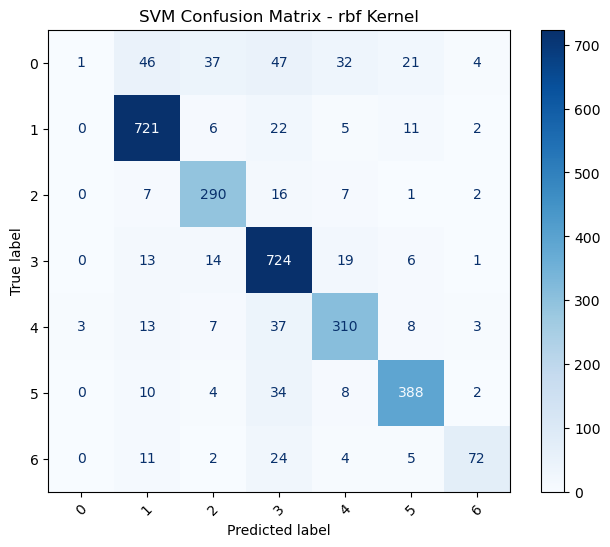


Classification Report - rbf Kernel:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       188
           1       0.88      0.94      0.91       767
           2       0.81      0.90      0.85       323
           3       0.80      0.93      0.86       777
           4       0.81      0.81      0.81       381
           5       0.88      0.87      0.88       446
           6       0.84      0.61      0.71       118

    accuracy                           0.84      3000
   macro avg       0.75      0.72      0.72      3000
weighted avg       0.80      0.84      0.81      3000


Tuning SVM with poly kernel...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


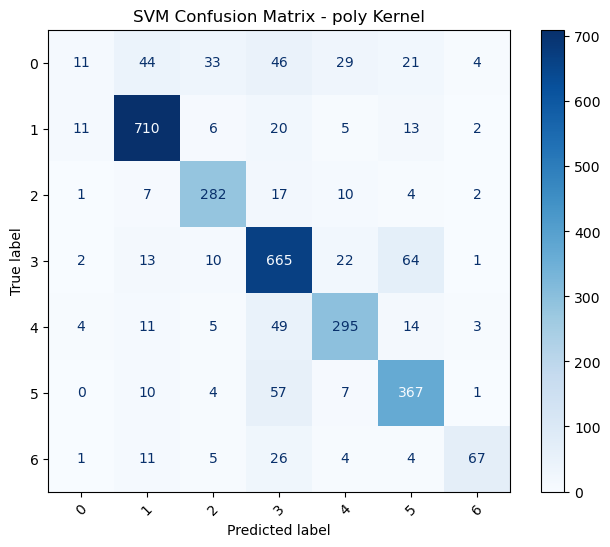


Classification Report - poly Kernel:
              precision    recall  f1-score   support

           0       0.37      0.06      0.10       188
           1       0.88      0.93      0.90       767
           2       0.82      0.87      0.84       323
           3       0.76      0.86      0.80       777
           4       0.79      0.77      0.78       381
           5       0.75      0.82      0.79       446
           6       0.84      0.57      0.68       118

    accuracy                           0.80      3000
   macro avg       0.74      0.70      0.70      3000
weighted avg       0.78      0.80      0.78      3000


Tuning SVM with sigmoid kernel...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


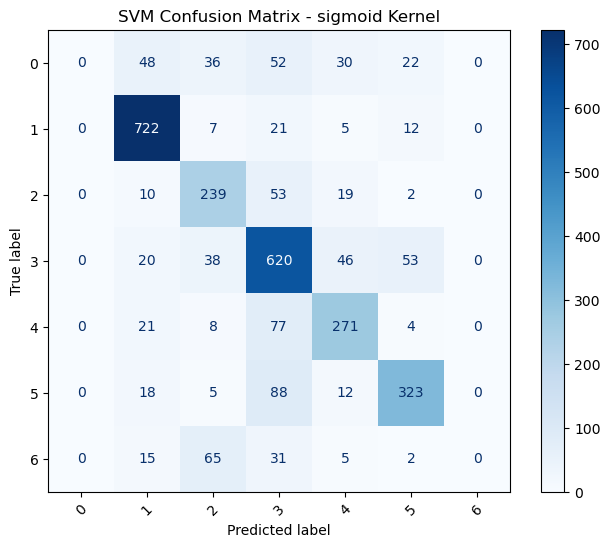


Classification Report - sigmoid Kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.85      0.94      0.89       767
           2       0.60      0.74      0.66       323
           3       0.66      0.80      0.72       777
           4       0.70      0.71      0.70       381
           5       0.77      0.72      0.75       446
           6       0.00      0.00      0.00       118

    accuracy                           0.72      3000
   macro avg       0.51      0.56      0.53      3000
weighted avg       0.65      0.72      0.69      3000


 Grid Search Results for SVM Kernels

Kernel: linear
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Test Accuracy: 0.7357

Kernel: rbf
Best Parameters: {'C': 100, 'degree': 3, 'gamma': 'scale'}
Test Accuracy: 0.8353

Kernel: poly
Best Parameters: {'C': 100, 'degree': 3, 'gamma': 'scale'}
Test Accuracy: 0.7990

Kernel: sigmoid
Best Parameters: {'C':

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/fw/5mws3bxj5x5dq0d0m7ccw

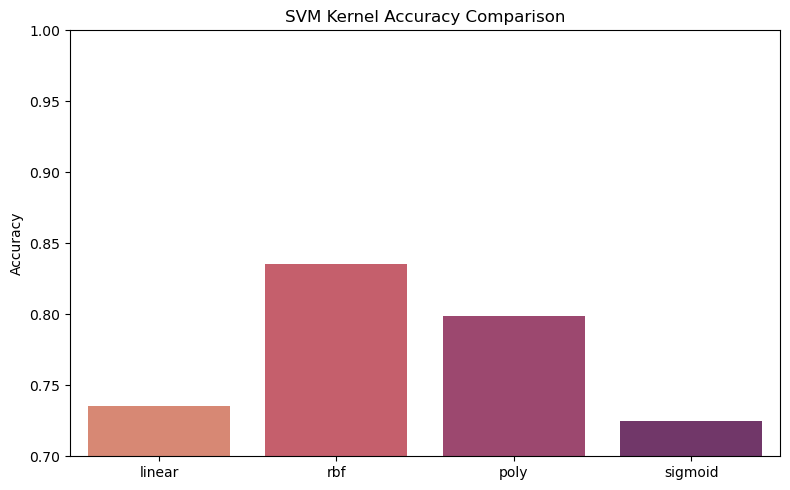

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Kernel options
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_params_per_kernel = {}
test_accuracies = {}
best_models = {}

for kernel in kernels:
    print(f"\nTuning SVM with {kernel} kernel...")
    
    # Define grid for current kernel
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1] if kernel in ['rbf', 'poly', 'sigmoid'] else ['scale'],
        'degree': [2, 3, 4] if kernel == 'poly' else [3]
    }

    # Grid search
    grid_search = GridSearchCV(SVC(kernel=kernel), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and metrics
    best_model = grid_search.best_estimator_
    best_models[kernel] = best_model
    best_params_per_kernel[kernel] = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    test_accuracy = best_model.score(X_test, y_test)
    test_accuracies[kernel] = test_accuracy

    # Confusion Matrix (save as PNG)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
    plt.title(f"SVM Confusion Matrix - {kernel} Kernel")
    plt.savefig(f"svm_confusion_{kernel}.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Classification Report
    print(f"\nClassification Report - {kernel} Kernel:")
    print(classification_report(y_test, y_pred))

# Summary of results
print("\n Grid Search Results for SVM Kernels")
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    print(f"Best Parameters: {best_params_per_kernel[kernel]}")
    print(f"Test Accuracy: {test_accuracies[kernel]:.4f}")

# Accuracy comparison plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), palette='flare')
plt.title('SVM Kernel Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.savefig("svm_kernel_accuracy_comparison.png", dpi=300)
plt.show()
plt.close()
